# Deep Reinforcement Learning - AGENTS

The agents in the Reinforcement Learning is the component that makes the decision of what actions to take.
In order to make the decision, the agents is allowed to use any obseration from the enviornment and any internal rules that has. Those internal rule can be aything, but typically in Reinforcement Learning, it expects the current state to be provided by the environment, for that state to have the Markov property, and that it processes that state using a policy π(a|s) that decides what action to take.  

In addition, in RL we usually care about handling a reward signal (received from the environment) and optimising the agent towards maximising the expected reward in future. To do this, the agent will maintain some data which is influenced by the rewards it received in the past, and use that to construct a better policy.

One interesting thing about the definition of an agent, is that the agent/environment boundary is usually considered to be very close to the abstract decision making unit. For instance, for a robot, the agent is typically not the whole robot, but the specific program running on the robot's CPU that makes the decision on the action. All the relays/motors and other parts of the physical body of the robot are parts of the environment in RL terms. Although often loose language is used here, as the distinction might not matter in most descriptions - we would say that "the robot moves its arm to achieve the goal" when in stricter RL terms we should say that "the agent running on the robot CPU instructs the arm motors to move to achieve the goal".

In Deep Reinforcement,To predict the actions directly The algorithm uses Neural Networks as a function Approximator. Actor-Critic, well know alogithm used this days in solving relative problems, is used in DDPG (deep deterministic policy gradient) for which the actor predicts the action that hinges on the state and the critic predicts the Q-value, which calculate the maximum expected future rewards for action at each state. Alike the Deep Q Network, To train the network Deep deterministic Policy gradient uses Replay buffer and target network. 

Replay Buffer, the buffer that stores the experiences, The basic idea is that by storing an agent’s experiences, and then randomly drawing batches of them to train the network, we can more robustly learn to perform well in the task. By keeping the experiences we draw random, we prevent the network from only learning about what it is immediately doing in the environment, and allow it to learn from a more varied array of past experiences. 

Target network is used to generate the target-Q values that will be used to compute the loss for every action during training. Why not use just use one network for both estimations? The issue is that at every step of training, the Q-network’s values shift, and if we are using a constantly shifting set of values to adjust our network values, then the value estimations can easily spiral out of control. The network can become destabilized by falling into feedback loops between the target and estimated Q-values. In order to mitigate that risk, the target network’s weights are fixed, and only periodically or slowly updated to the primary Q-networks values. In this way training can proceed in a more stable manner.

Deep deterministic Policy gradient, has been bound with limited agents and the above implementation has multiple agents so to train that Multi Agents Deep Deterministic Policy Gradient is used. Parallely, Just doing a simple extension of single agent RL by independently training the two agents does not work very well because the agents are independently updating their policies as learning progresses. And this causes the environment to appear non-stationary from the viewpoint of any one agent. While we can have non-stationary Markov processes, the convergence guarantees offered by many RL algorithms such as Q-learning requires stationary environments. While there are many different RL algorithms for multi-agent settings, for this project I chose to use the Multi Agent Deep Deterministic Policy Gradient (MADDPG) algorithm. In MADDPG, each agent’s critic is trained using the observations and actions from all the agents, whereas each agent’s actor is trained using just its own observations. This allows the agents to be effectively trained without requiring other agents’ observations during inference (because the actor is only dependent on its own observations). 

The project has two files model.py, ddpg.py 

1. Model.py: In this file neural network is used to predict the z distribution value and action for given state. For each agent’s actor, I used a three-layer neural network with neurons of 400 units in the input layer, 300 units in the second hidden layer, and action_dim units in the output layer. For each agent’s critic, I used a three-layer neural network with 400 neuron units in the input layer, 300+action_dim units in the hidden layer (and both agents’ actions are concatenated with the output of the input layer), z_dist units in the third layer. for every layer followed by relu activation function. Xavier initialization in the top layer and uniform initialization between +0.003 and -0.003 in the last layer


2. ddpg.py: Angent file has the class for Replay Buffer, class for an agent and a class for a Multi Agent Deep Deterministic Policy Gradient. Lenght of the replay buffer is set to 100000. Gaussing values is used unsettle the actions to explore the enviroment and to scale a noise in process of training while the batch hits 256 samples from buffer. Learning rate for both the actor and critic optimizer are set to 1e-4. weight decay is set to 0 for both critic and actor network. 


Plot of the average score vs episode.
![plot.png](https://github.com/vanditkaria/Reinforcement-Learning/blob/master/collab-compet/plot.png)

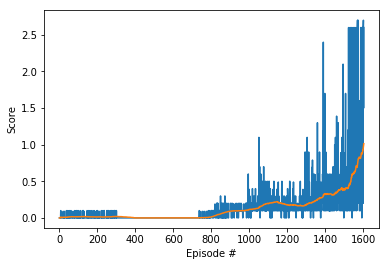


The algorith can be further more improved by protiritising replay buffer and instead of single step bootstraping we can use n number of bootstraping. Algorithms can be also further enhanced by implementing other algorithms like, D4PG, PPO or A3C  to solve the environment. 
